In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Read data into DataFrame from CSV file
# cyclone_df = pd.read_csv("Cyclone_ML.csv")
cyclone_df = pd.read_csv("data/Cyclone_ML.csv")

# Select features for machine learning and assign to X
selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD"]]
X = selected_features

# Set y to compass direction of cyclone based on wind direction degree
# y = cyclone_df["MAX_REP_WIND_DIR"]
y = cyclone_df["CENTRAL_INDEX (CI)"].values.reshape(-1,1)

print(X.shape, y.shape)

(1692, 6) (1692, 1)


In [18]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD
0,3.0,40.0,-19.00,146.40,952.0,46.3
1,1.0,20.0,-11.00,92.60,1001.0,12.9
2,1.0,20.0,-11.10,93.10,1002.0,12.9
3,1.0,20.0,-11.10,94.20,1003.0,12.9
4,1.0,20.0,-11.10,94.60,1000.0,12.9
...,...,...,...,...,...,...
1687,2.0,30.0,-14.30,126.40,986.0,20.6
1688,4.0,21.0,-12.73,130.61,999.0,20.6
1689,2.0,30.0,-12.54,130.72,993.0,18.0
1690,2.0,30.0,-12.41,130.99,995.0,18.0


In [19]:
y

array([[5.05199407],
       [2.06400481],
       [1.95045442],
       ...,
       [2.80160494],
       [2.63810555],
       [2.72118357]])

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
# Linear Regression Model
model = LinearRegression()
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [23]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
    
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.9672302132286147
Testing Data Score: 0.9690365220804451


In [24]:
predictions = model.predict(X_test)
predictions

array([[-744.26470094],
       [-743.9398092 ],
       [-705.69220792],
       [-730.6702294 ],
       [-735.95729946],
       [-743.96006938],
       [-742.71631923],
       [-750.23359488],
       [-735.71100579],
       [-748.64147296],
       [-744.82810667],
       [-677.22177365],
       [-739.93215395],
       [-733.45285766],
       [-743.97856068],
       [-742.68958368],
       [-739.97725382],
       [-700.89539916],
       [-758.72060418],
       [-715.20209708],
       [-743.81573593],
       [-685.86527316],
       [-742.74796582],
       [-752.87686458],
       [-710.91579851],
       [-718.89359678],
       [-710.00509654],
       [-715.1565309 ],
       [-751.07284686],
       [-743.12024966],
       [-706.68841164],
       [-754.53067224],
       [-714.69549914],
       [-745.77794221],
       [-699.26844384],
       [-726.11828427],
       [-715.35704439],
       [-741.00100806],
       [-749.99549108],
       [-757.98736495],
       [-729.86782388],
       [-740.138

Text(0.5, 1.0, 'Residual Plot')

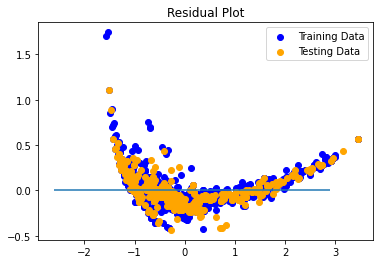

In [25]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

In [26]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.031023899515910225, R2: 0.9690365220804451
